# Computer vision 992 final project
## Part one
### Calculate the homography matrix for two given images

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

First of all let's read and display both images

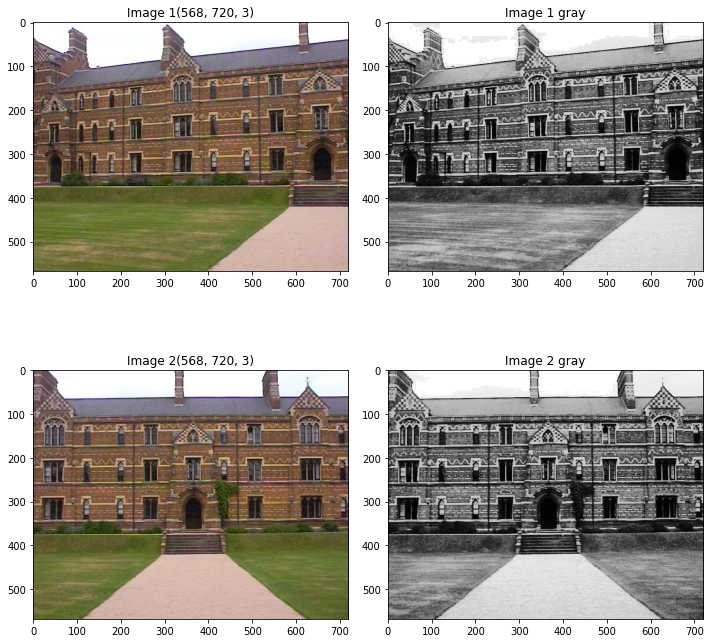

In [2]:
img1 = cv.imread("./images/building1.jpg")
img2 = cv.imread("./images/building2.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img1_gray = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
img2_gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
img1_gray = cv.equalizeHist(img1_gray)
img2_gray = cv.equalizeHist(img2_gray)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img1)
plt.title("Image 1"+str(img1.shape))
plt.subplot(2,2,2)
plt.imshow(img1_gray, cmap="gray")
plt.title("Image 1 gray")
plt.subplot(2,2,3)
plt.imshow(img2)
plt.title("Image 2" + str(img2.shape))
plt.subplot(2,2,4)
plt.imshow(img2_gray, cmap="gray")
plt.title("Image 2 gray")
plt.tight_layout()
plt.show()

To calculate the homography matrix between two images we are in need of some **intrest points** in both images. These point could be calculated using Harris Detector method. fortunatly OpenCV has a built in function as cornerHarris that calculates these corners for us. 

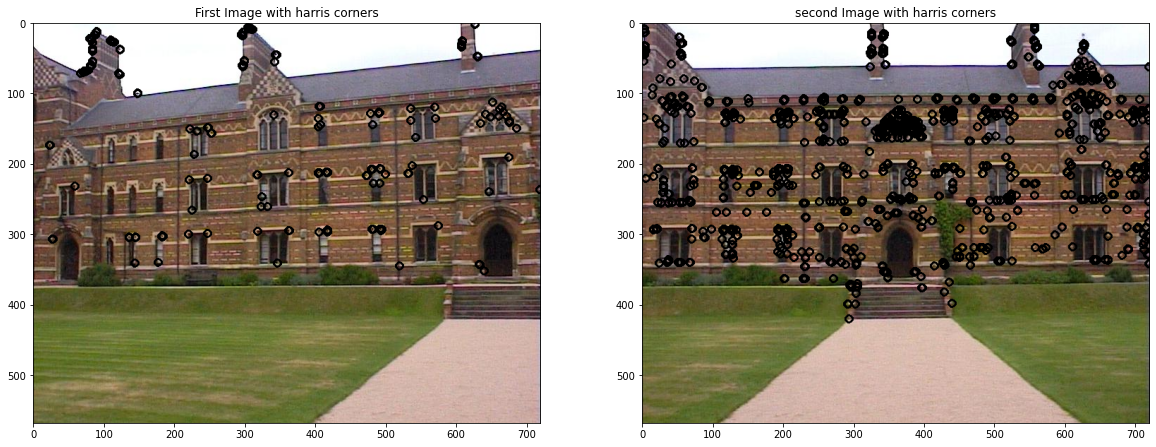

In [3]:
# Thresholds
threshold = 100
# Detector parameters
blockSize = 2
apertureSize = 3
k = 0.04
# Detecting corners
dst1 = cv.cornerHarris(img1_gray, blockSize, apertureSize, k)
dst2 = cv.cornerHarris(img2_gray, blockSize, apertureSize, k)
# Normalizing
dst_norm1 = np.empty(dst1.shape, dtype=np.float32)
dst_norm2 = np.empty(dst2.shape, dtype=np.float32)
# Normalization
dst_norm1 = cv.normalize(dst1, dst_norm1, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
dst_norm2 = cv.normalize(dst2, dst_norm2, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

dst_norm_scaled1 = cv.convertScaleAbs(dst_norm1)
dst_norm_scaled2 = cv.convertScaleAbs(dst_norm2)

img1_cpy = np.array(img1)
img2_cpy = np.array(img2)

intrest_points1 = []
# Drawing a circle around corners around first image
for i in range(dst_norm1.shape[0]):
    for j in range(dst_norm1.shape[1]):
        if dst_norm1[i,j] > threshold:
            intrest_points1 += [(j,i)]
            cv.circle(img1_cpy, (j,i), 5, (0), 2)

intrest_points2 = []
# Drawing a circle around corners in second image
for i in range(dst_norm2.shape[0]):
    for j in range(dst_norm2.shape[1]):
        if dst_norm2[i,j] > threshold:
            intrest_points2 += [(j,i)]
            cv.circle(img2_cpy, (j,i), 5, (0), 2)

# Showing the result
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img1_cpy, cmap="gray")
plt.title("First Image with harris corners")
plt.subplot(1,2,2)
plt.title("second Image with harris corners")
plt.imshow(img2_cpy, cmap="gray")
plt.show()

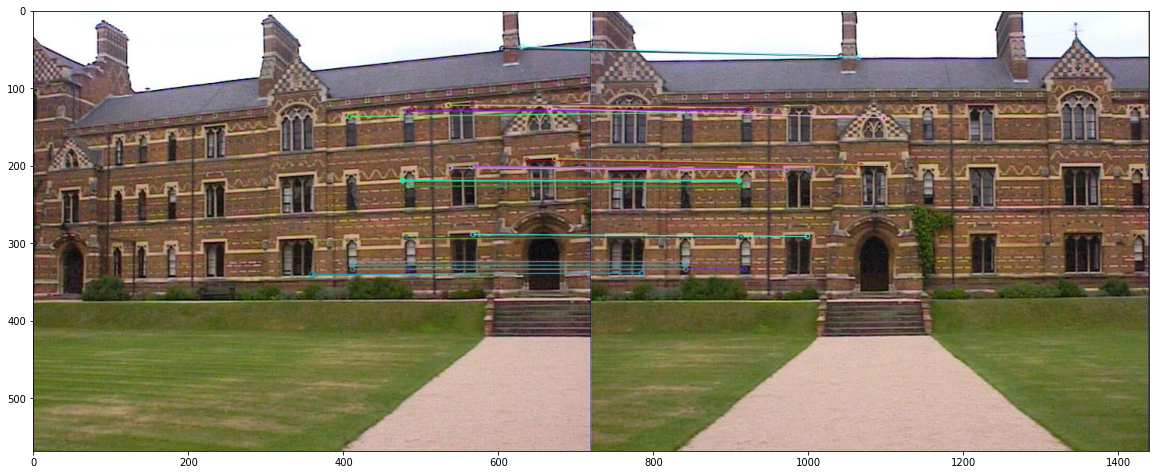

In [6]:
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:30],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.show()

In [19]:
print(len(matches))

205


## Part two
### Placing a picture in a frame
At this part we will take four point in the base image and and calculate the homography matrix btween the banners corners and these four points(frame points). Then by multiplying the bannet to homography matrix we place this image insde the defined frame.

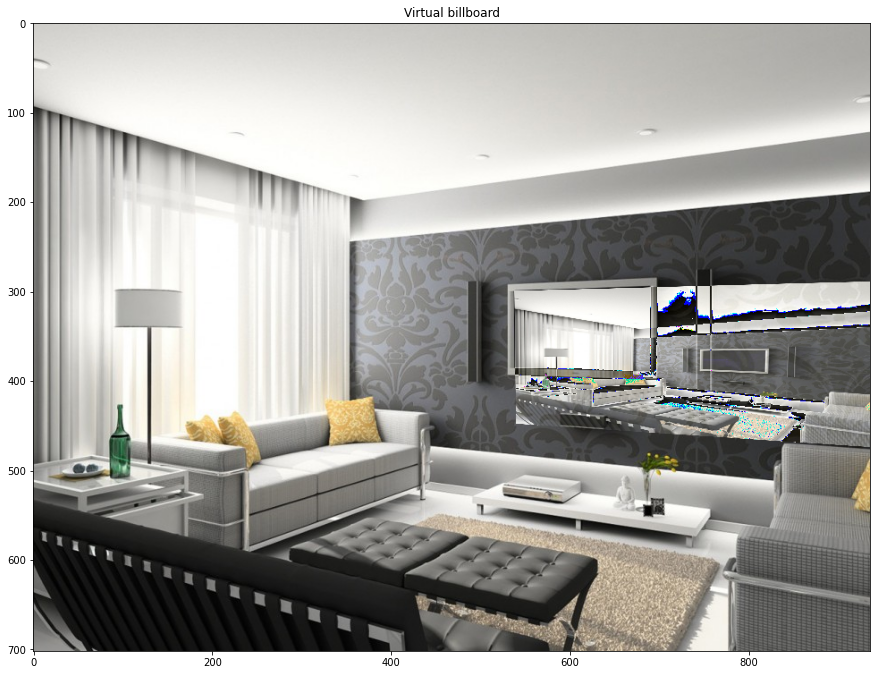

In [17]:

base_image = cv.imread('./images/room.jpg')
banner = cv.imread("./images/gholami.jpeg")

# Height and width of the banner
height, width = banner.shape[:-1]

# Frame points
frame_pts = np.array([[538,299], [690,295], [689,388], [539,384]])
base_pts = np.array([[0,0], [width-1,0],[width-1, height-1], [0,height-1]])

# Calculating homography matrix
H, status = cv.findHomography(base_pts, frame_pts)
im_out = cv.warpPerspective(banner, H, (base_image.shape[1],base_image.shape[0]))
base_image = cv.fillConvexPoly(base_image, frame_pts, 0, 16)
results = base_image + im_out
results = cv.cvtColor(results, cv.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.imshow(results)
plt.title("Virtual billboard")
plt.show()